In [11]:
import os
import sqlite3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [9]:
current_dir = os.getcwd()
db_path = os.path.join(current_dir, "..", "db.sqlite3")
conn = sqlite3.connect(db_path)

query = """
SELECT *
FROM restaurant_product p
LEFT JOIN restaurant_orderitem oi ON p.id = oi.product_id
LEFT JOIN restaurant_order o ON oi.order_id = o.id
"""

df = pd.read_sql_query(query, conn)
df.to_csv("restaurant.csv", index=False)
conn.close()
df

,id,price,name,id,quantity,order_id,product_id,id,datetime
0,1,0.50,Mint Sauce,44,2,9,1,9,2019-08-03 19:28:00
1,1,0.50,Mint Sauce,60,2,11,1,11,2019-08-03 19:25:00
2,1,0.50,Mint Sauce,80,1,14,1,14,2019-08-03 18:36:00
3,1,0.50,Mint Sauce,106,1,19,1,19,2019-08-03 18:00:00
4,1,0.50,Mint Sauce,113,1,20,1,20,2019-08-03 17:58:00
...,...,...,...,...,...,...,...,...,...
74813,248,17.95,House white wine 75cl,74785,1,10879,248,10879,2017-02-09 20:47:00
74814,248,17.95,House white wine 75cl,74786,1,5409,248,5409,2017-01-20 18:39:00
74815,248,17.95,House white wine 75cl,74789,1,5423,248,5423,2017-01-03 19:27:00
74816,248,17.95,House white wine 75cl,74810,1,11284,248,11284,2016-07-31 12:49:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

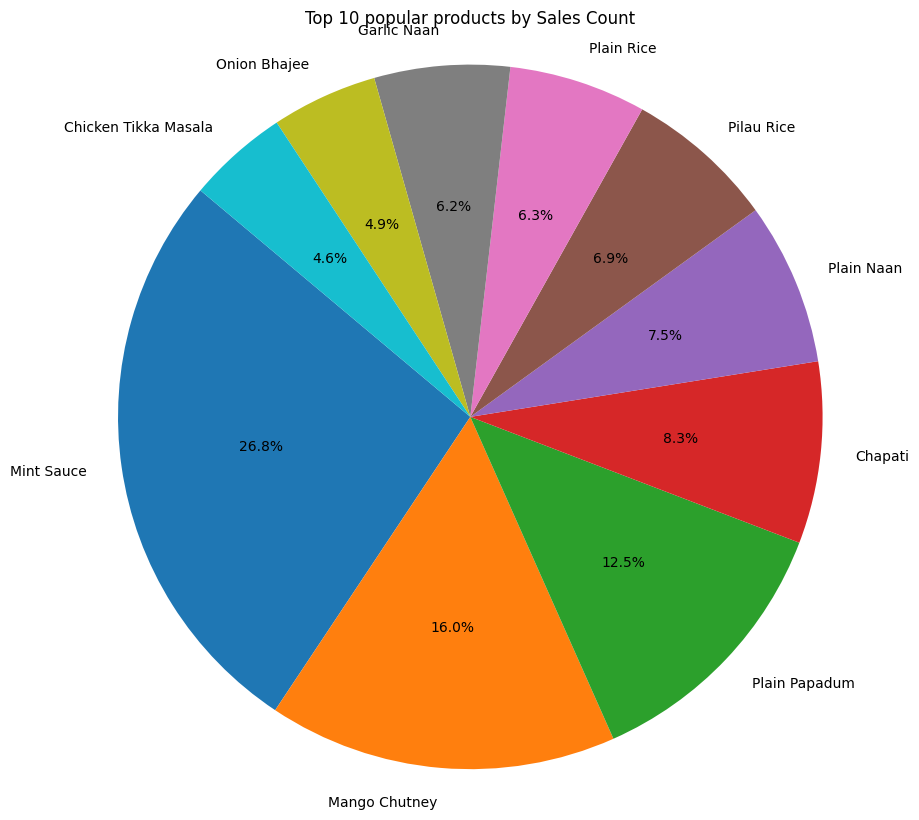

In [23]:
product_sales = df.groupby("product_id")["quantity"].sum()
top_10_products = product_sales.sort_values(ascending=False).head(10)
popularity_percentages = (top_10_products / top_10_products.sum()) * 100
product_names = df[df["product_id"].isin(top_10_products.index)]["name"].dropna().drop_duplicates()
plt.figure(figsize=(10, 10))
plt.pie(popularity_percentages, labels=product_names, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 popular products by Sales Count")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

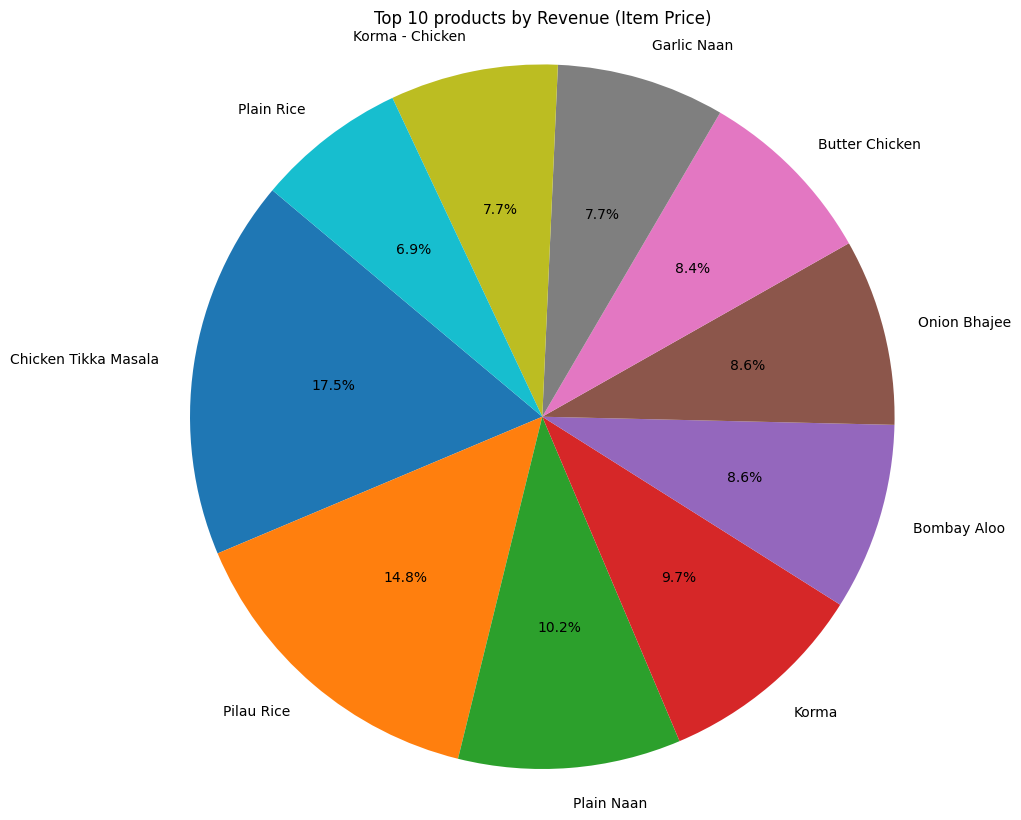

In [25]:
df["item_price"] = df["price"] * df["quantity"]
product_sales = df.groupby("name")["item_price"].sum()
top_10_products = product_sales.sort_values(ascending=False).head(10)
popularity_percentages = (top_10_products / top_10_products.sum()) * 100
plt.figure(figsize=(10, 10))
plt.pie(popularity_percentages, labels=top_10_products.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 products by Revenue (Item Price)")
plt.axis("equal")
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

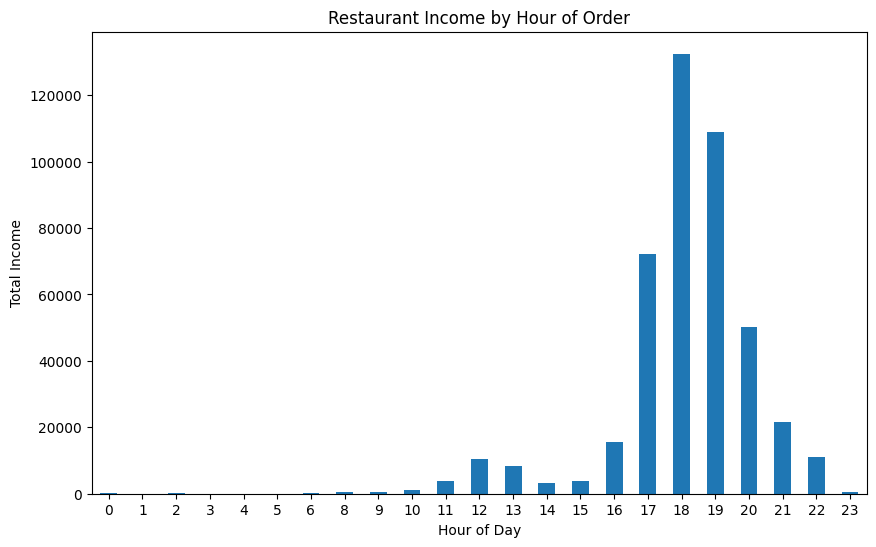

In [26]:
df["order_hour"] = pd.to_datetime(df["datetime"]).dt.hour
hourly_income = df.groupby("order_hour")["item_price"].sum()
hourly_income.plot(kind="bar", figsize=(10, 6))
plt.title("Restaurant Income by Hour of Order")
plt.xlabel("Hour of Day")
plt.ylabel("Total Income")
plt.xticks(rotation=0)
plt.show()


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

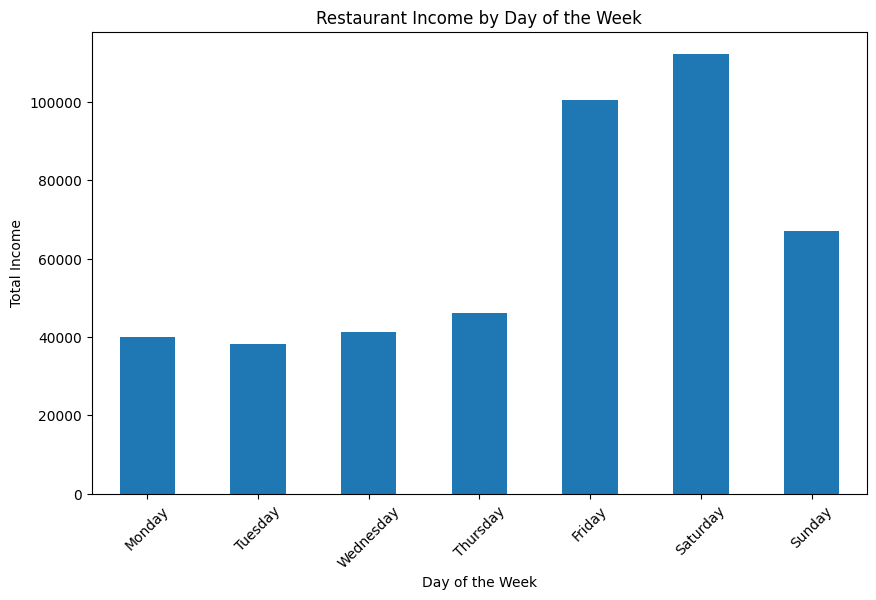

In [27]:
df["order_day_of_week"] = pd.to_datetime(df["datetime"]).dt.weekday
daily_income = df.groupby("order_day_of_week")["item_price"].sum()
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_income.index = [days_of_week[i] for i in daily_income.index]
daily_income.plot(kind="bar", figsize=(10, 6))
plt.title("Restaurant Income by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.show()